<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [2]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('./../dat/past.csv.gz')

past.tail()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4999,5853603,4.144132e+08,1.333333,1.333333,23389.000000,5.426667,5.426667,0.333333,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0,0.333333,1.000000


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [3]:
# YOUR CODE HERE
percentage = len(past[past['Purchased?']==1])/past.shape[0] * 100
print(percentage)
#print((past.info()) # 37 columns, 5000 entries

print("number of purchases vs non-purchases in data:")
print(past['Purchased?'].value_counts())

# 34% so it looks like people do shopping around without buying.
# The data is unbalanced

34.38
number of purchases vs non-purchases in data:
0    3281
1    1719
Name: Purchased?, dtype: int64


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [4]:
# YOUR CODE HERE
# YOUR CODE HERE
past.drop(columns=['product_id', 'user_id'], inplace=True)


y = past.pop('Purchased?')
X = past
print(past.info()) # 37 -> 34 columns, 5000 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumOfEventsInJourney  5000 non-null   float64
 1   NumSessions           5000 non-null   float64
 2   interactionTime       5000 non-null   float64
 3   maxPrice              5000 non-null   float64
 4   minPrice              5000 non-null   float64
 5   NumCart               5000 non-null   float64
 6   NumView               5000 non-null   float64
 7   NumRemove             5000 non-null   float64
 8   InsessionCart         5000 non-null   float64
 9   InsessionView         5000 non-null   float64
 10  InsessionRemove       5000 non-null   float64
 11  Weekend               5000 non-null   float64
 12  Fr                    5000 non-null   float64
 13  Mon                   5000 non-null   float64
 14  Sat                   5000 non-null   float64
 15  Sun                  

In [5]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [7]:
# YOUR CODE HERE
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_X)
X_reduced = pca.transform(scaled_X)

In [8]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [9]:
# YOUR CODE HERE

#print('Components ', list(pca.components_))
#print('Mean ', pca.mean_) # mean of each column

print('Explained Variance ', pca.explained_variance_ratio_ )
# returns a vector of the variance explained by each dimension.
#So what this is showing you is showing you the percent of explained variance for each factor in it organizes them.
#It sorts them according to the from the most significant to the least significant.

#The instructions were to just select the top 5 right in terms of explain variance. 
#How much variance does that explain? 
# 35%, not too much, not good
# we're discarding 65 of the quote unquote information here. discard 29 features.

#!!!!
#BUT ultimately you know what determines. Whether that's good enough or not is the performance of your of your end model right?

# Now train a model with this reduced features, that and you're still getting good performance this Dimensionality Reduction is ok

Explained Variance  [0.10282139 0.094459   0.06513405 0.05054418 0.04133366]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [10]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [11]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

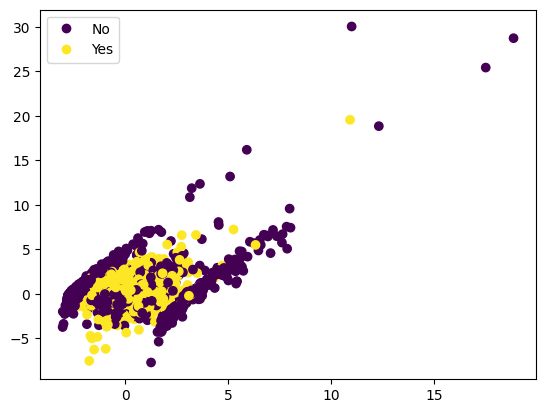

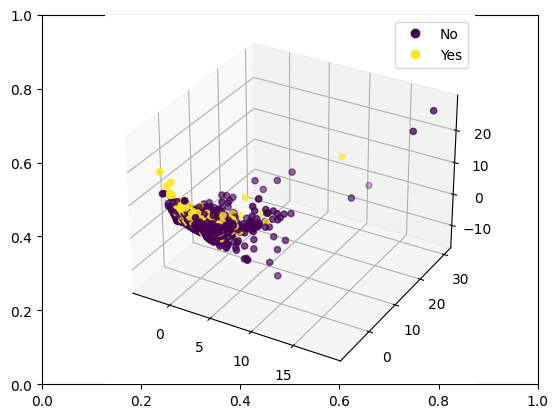

In [12]:
# YOUR CODE HERE
# YOUR CODE HERE
# do scaler as preprocess the data before performing PCA
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)

In [ ]:
# You can label them if you like. 
# Yeah, because PCA they are synthetic features. Original labels from data are not meaningfull for this features?

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [13]:
# YOUR CODE HERE (imports!)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=0)

    lr_model = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train) # YOUR CODE HERE
    #lr_model = LogisticRegression().fit(X_train_reduced, y_train)
    lr_model.fit(X_train, y_train)
    preds = lr_model.predict(X_test) # YOUR CODE HERE
    print(classification_report(y_test, preds))
    print(np.unique(preds))



Now apply the pipeline on the all the features `X` and review the performance

In [14]:
train(scaled_X, y)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000

[0 1]


Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [15]:
# YOUR CODE HERE
train(X_reduced, y)
# standardization was applied before performing PCA

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       649
           1       0.51      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.66      1000

[0 1]


8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*
    
    
    It's a surprise. I was expected decreasing the accuracy of the prediction because after PCA we saved only 35% of original features that's not too much. But it can be seen that is compared to the original dataset the accuracy decreaced only 3% that's acceptable. 

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [16]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [17]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k,random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

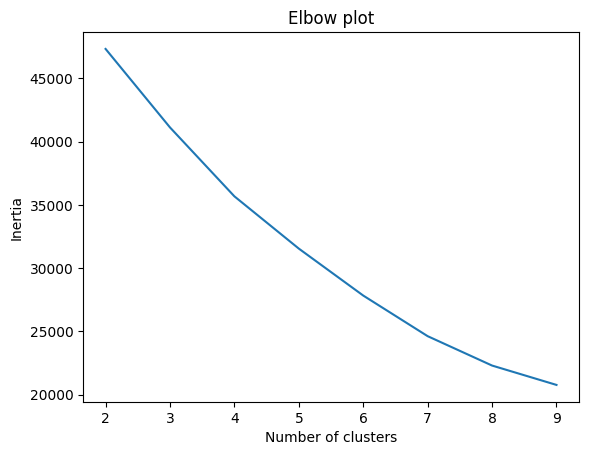

In [260]:
# YOUR CODE HERE
ks = range(2,10)
visualize_elbow(X_reduced, ks)

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*
    Elbow method slow for calculations, and the 'elbow' point is not very clearly visible on the plot.There is a doubt to what is optimal number for clusters. 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [261]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.25108473738709325
For n_clusters = 3 The average silhouette_score is : 0.2592855656926881
For n_clusters = 4 The average silhouette_score is : 0.27298702813944076
For n_clusters = 5 The average silhouette_score is : 0.2784651986971904
For n_clusters = 6 The average silhouette_score is : 0.24389148828241636
For n_clusters = 7 The average silhouette_score is : 0.2490191235988229
For n_clusters = 8 The average silhouette_score is : 0.25859942873679503


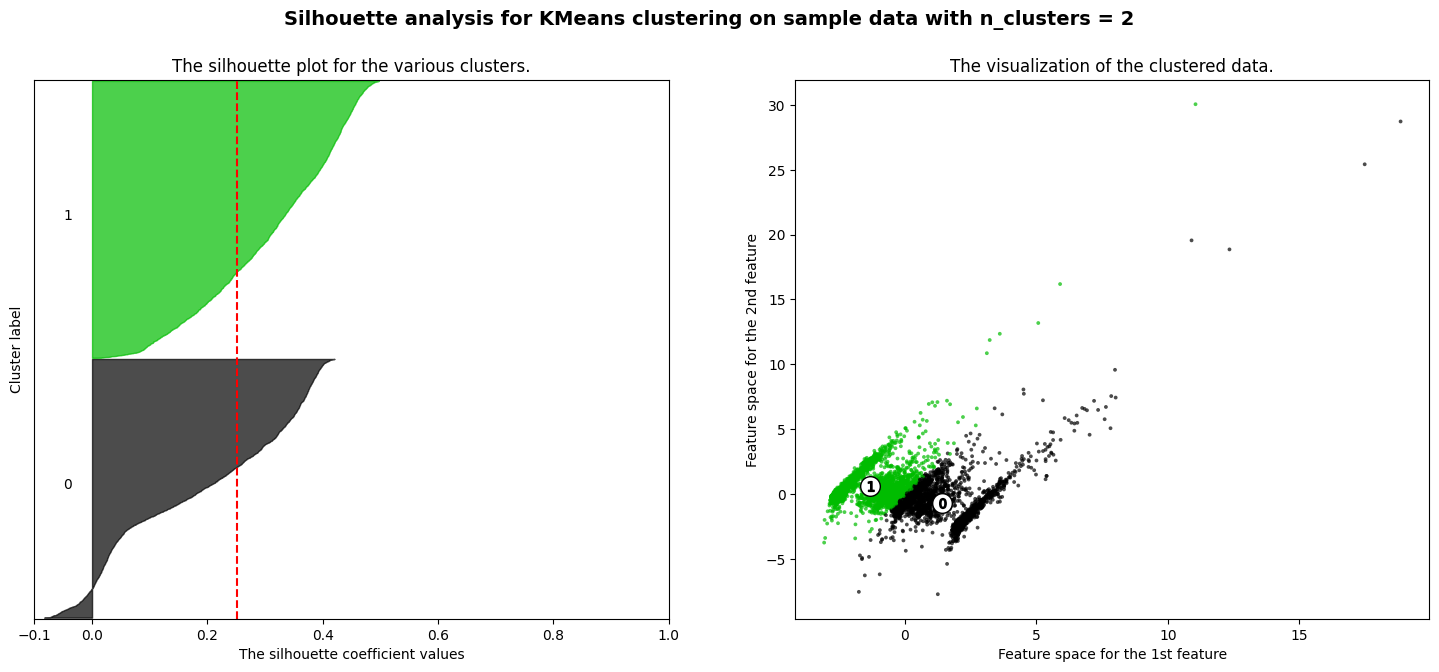

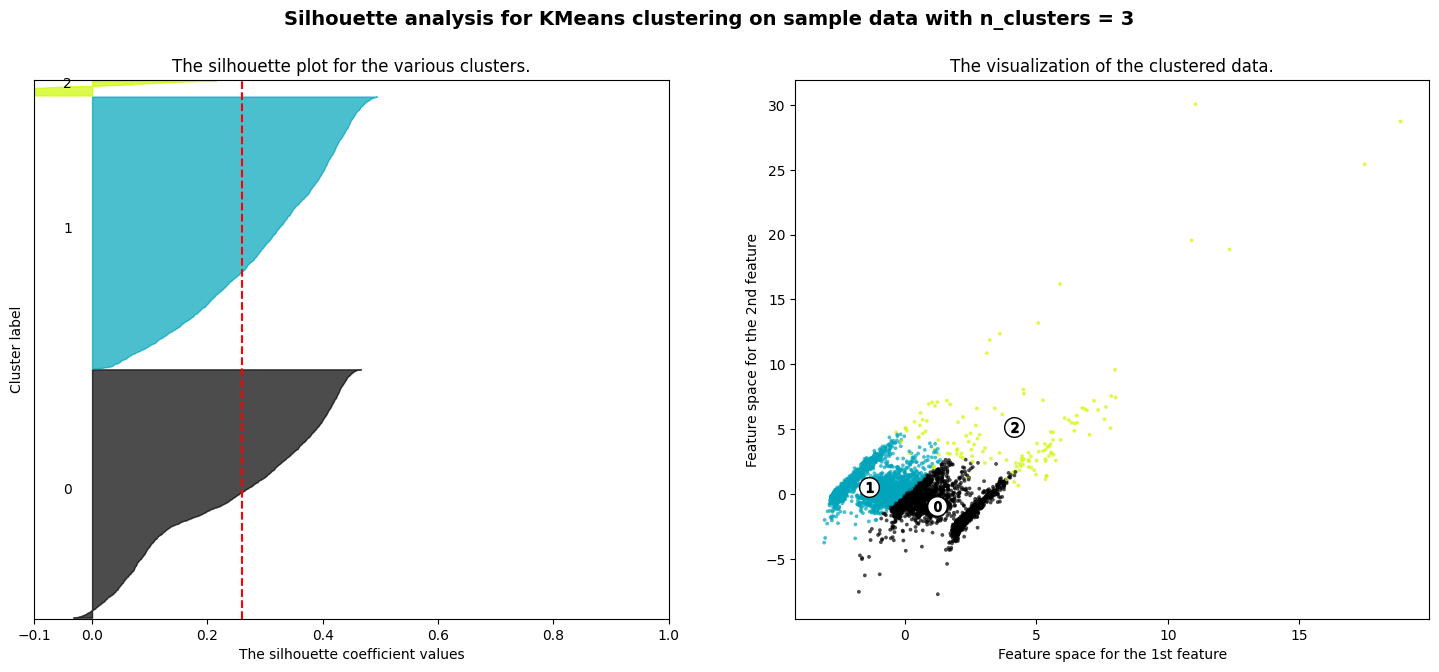

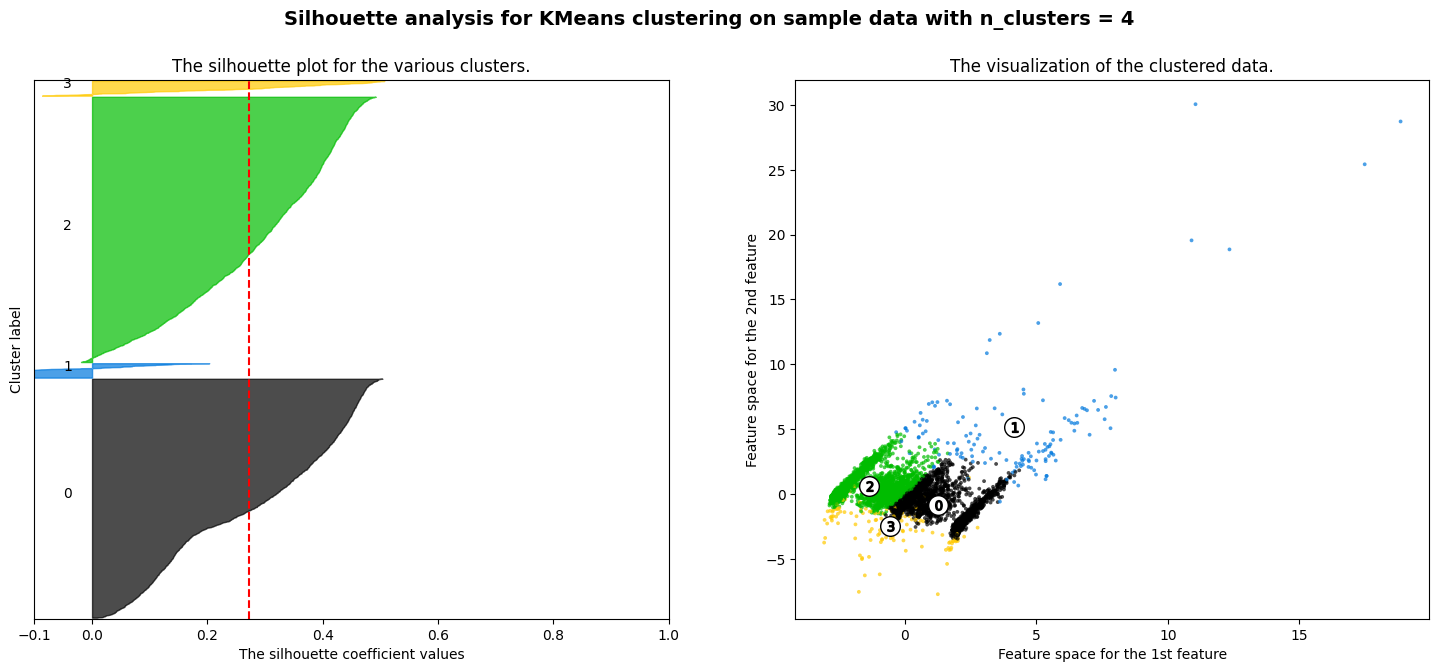

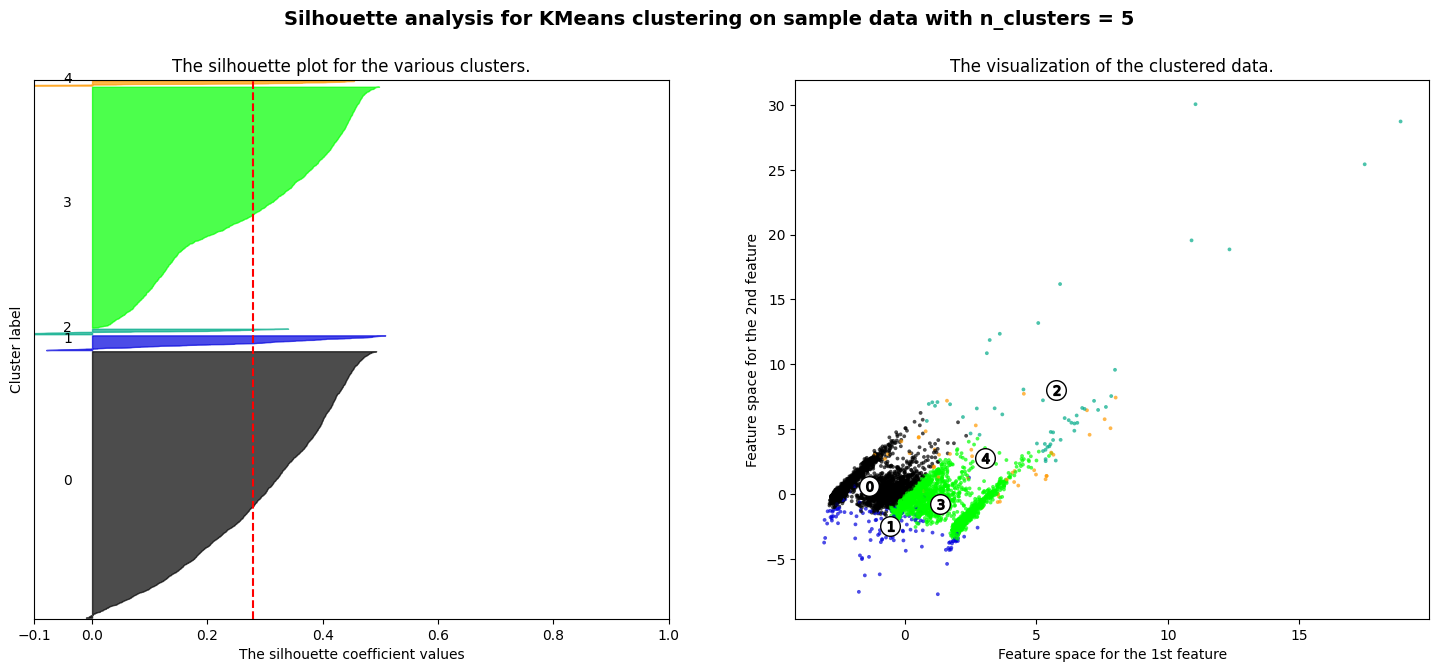

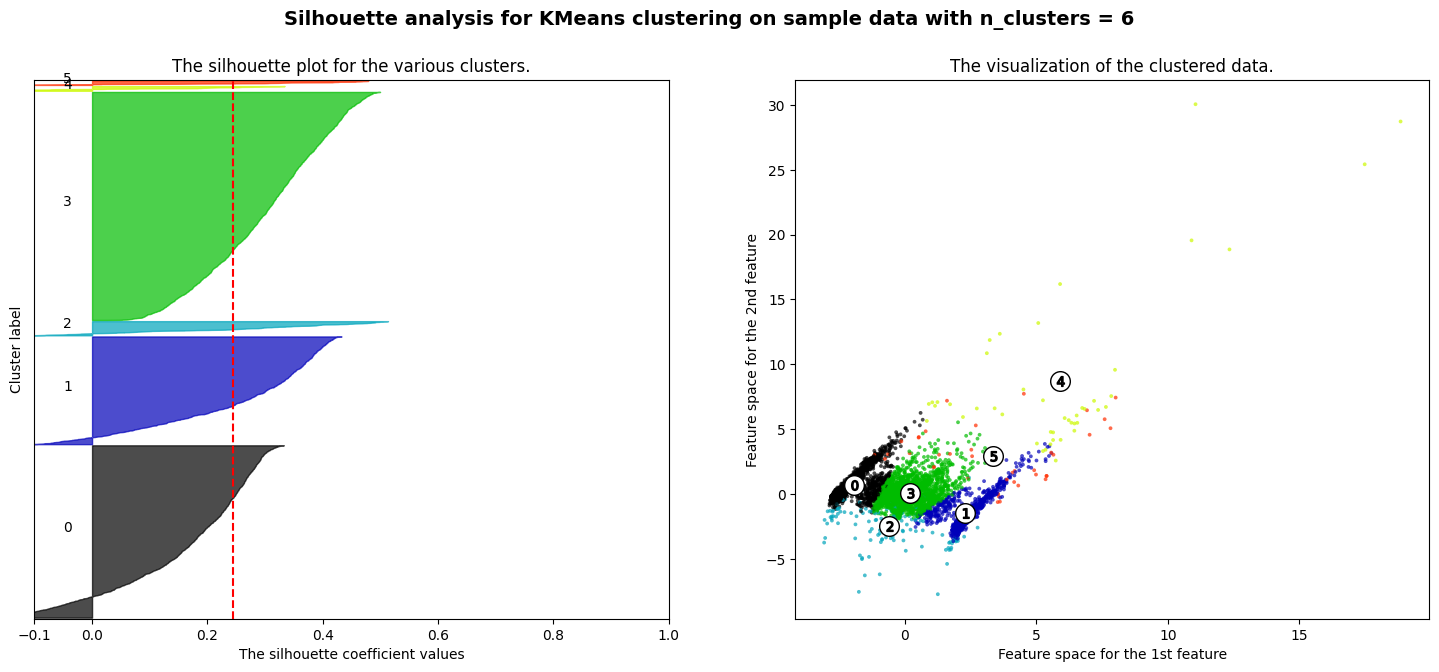

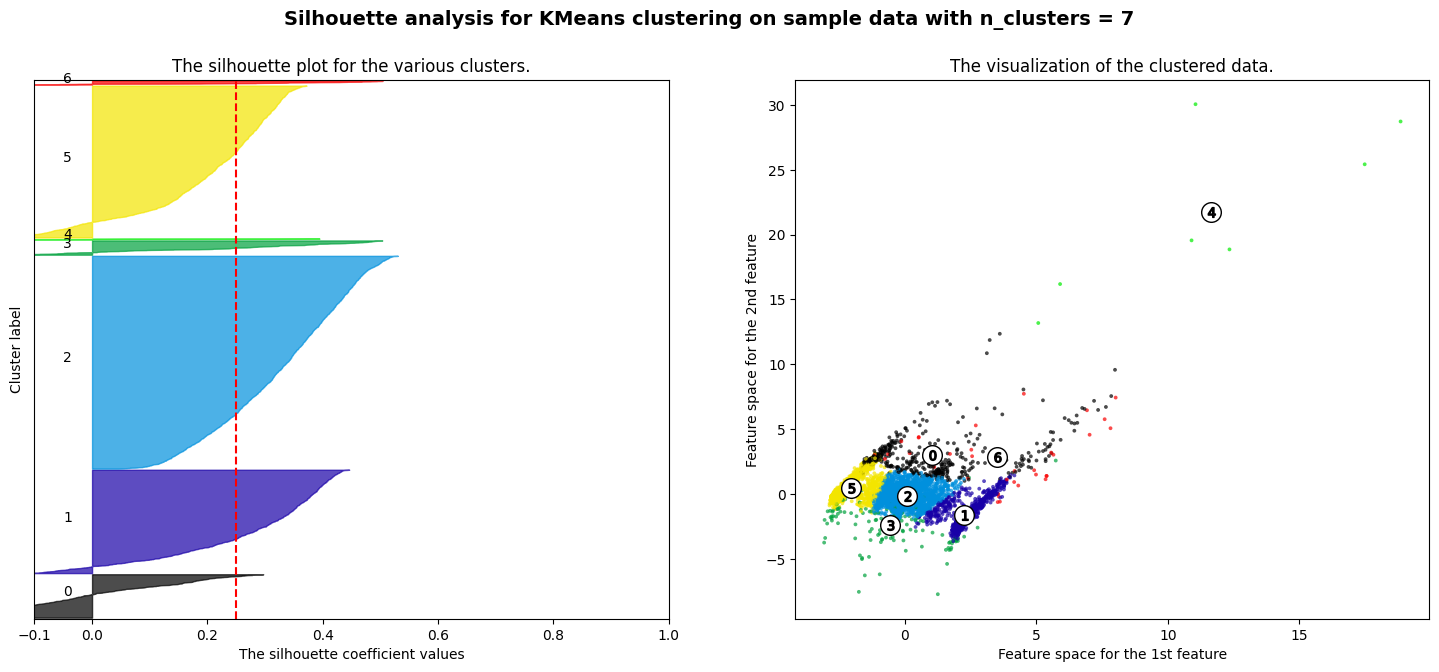

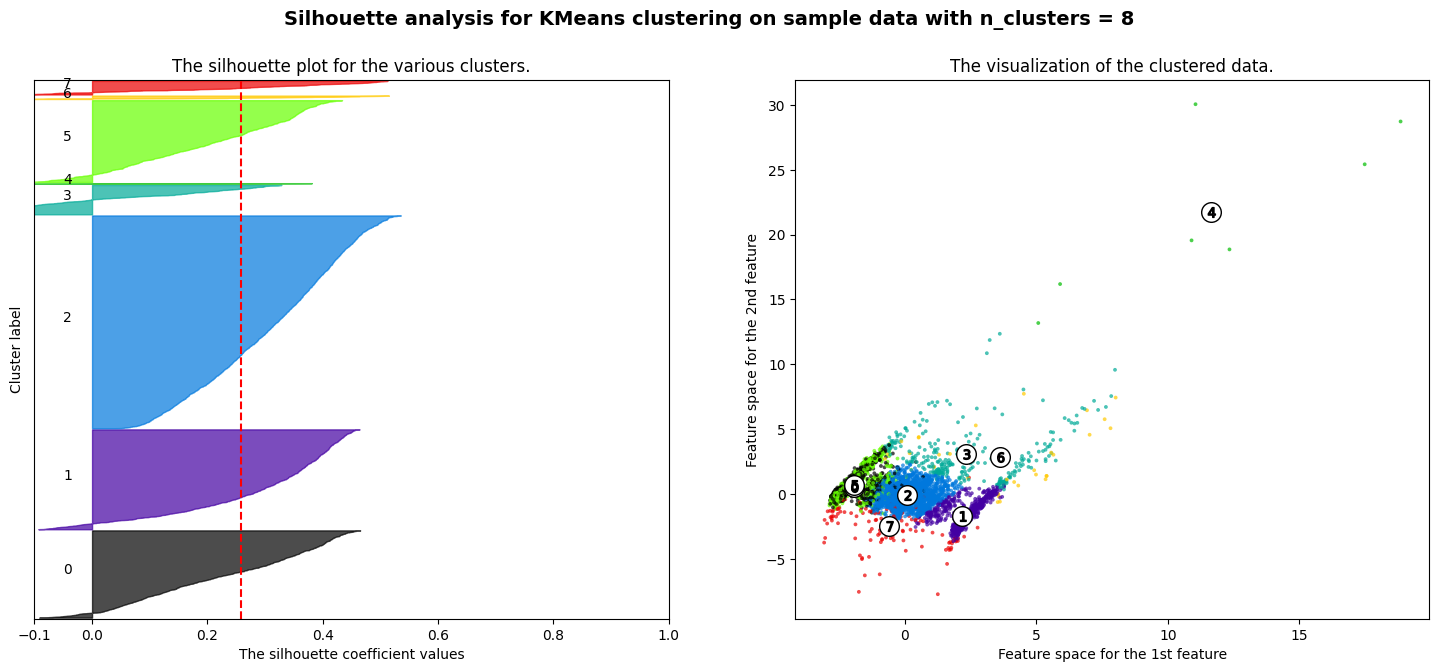

In [75]:
# YOUR CODE HERE
visualize_silhouette(max_clusters=8, X=X_reduced, random_state=10)

# The silhouette score actually is pretty close. Nothing really kind of jumps out. I will select the Max value. 

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [18]:
# YOUR CODE HERE
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [19]:
# YOUR CODE HERE
# each cluster how many data points are
import numpy as np
clusters = km.labels_
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))


{0: 145, 1: 2235, 2: 150, 3: 2470}


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [20]:
# YOUR CODE HERE
past['cluster_pca'] = km.predict(X_reduced)
past.tail()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category,cluster_pca
4995,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,14.500000,3.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1
4996,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,23.590909,29.863636,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,0.090909,1.045455,3
4997,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
4998,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,22.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
4999,1.333333,1.333333,23389.000000,5.426667,5.426667,0.333333,0.666667,0.333333,3.000000,15.333333,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,1.000000,3


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*
    I was thinking to see what features gives more value in forming clusters. For example, "NumOfEventsInJourney", "NumSessions" are most valuable in cluster 2. "maxPrice", "minPrice" are for cluster 1. So mayde this can help to undertand the meaningful of clusters. 
    Also I have this info about cluster sizes {0: 145, 1: 2235, 2: 150, 3: 2470}. Maybe it also can be considered somehow. Like continue with clusters 1 and 3. Just intuitively.

In [21]:
# YOUR CODE HERE
past.groupby("cluster_pca").mean()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
cluster_pca,,,,,,,,,,,,,,,,,,,,,
0,1.455520,1.178449,9.665701e+04,59.285213,59.237057,0.120745,1.227293,0.072131,3.000108,6.165737,...,0.154457,0.171060,0.227166,0.058059,0.196941,0.188745,0.181382,0.062465,0.085243,1.055141
1,1.827194,1.272756,2.011734e+05,6.343311,6.313842,0.506865,0.859634,0.362619,19.353081,14.087338,...,0.092254,0.093749,0.219588,0.063870,0.158427,0.250904,0.165618,0.081954,0.059638,1.104699
2,5.470234,2.974054,2.307234e+06,4.691940,4.467246,1.557148,1.882625,1.871214,165.250319,57.898045,...,0.122180,0.147578,0.201302,0.080740,0.140346,0.274629,0.114627,0.114018,0.074338,2.113584
3,1.878557,1.284886,1.762729e+05,5.591318,5.571136,0.536777,0.844858,0.391241,18.855944,14.786455,...,0.321571,0.240155,0.207547,0.067297,0.165865,0.239161,0.175054,0.088430,0.056646,1.125347


10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
    In the silhouettes plots "The visualization of the clustered data" above the clustering doesn't look satisfied. Using the list of clustering algorithms I would try Spectral Clustering or DBSCAN. 

In [32]:
# YOUR CODE HERE
import numpy as np
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn import metrics


dbs = DBSCAN(eps=3, min_samples=2).fit(X_reduced)
clusters = dbs.labels_
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

spectral_model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(X_reduced)
unique, counts = np.unique(labels_nn, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 26, 0: 4963, 1: 3, 2: 2, 3: 3, 4: 3}
{0: 2837, 1: 606, 2: 837, 3: 720}


11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [229]:
# YOUR CODE HERE
new = pd.read_csv('./../dat/new.csv.gz')

In [128]:
assert new.shape == (30091, 5)

In [58]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [230]:
# YOUR CODE HERE
past = pd.read_csv('./../dat/past.csv.gz')

similar_ids = np.intersect1d(past.product_id, new.product_id)
print('Number of product ids in both past and new data: ', len(similar_ids))

Number of product ids in both past and new data:  0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [72]:
# YOUR CODE HERE # ~.344
percentage = len(new[new['Purchased?']==1])/new.shape[0] * 100
print(percentage)

print("number of purchases vs non-purchases in data:")
print(new['Purchased?'].value_counts())

34.42557575354757
number of purchases vs non-purchases in data:
0    19732
1    10359
Name: Purchased?, dtype: int64


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [231]:
X_train = past[['maxPrice', 'minPrice','Category']].copy()
new.drop(columns=['product_id'], inplace=True)

y_test = new.pop('Purchased?')
X_test = new

#X1 = new[['maxPrice', 'minPrice','Category']].copy()
y_train = past.pop('Purchased?')

#X_train, X_test, y_train, y_test = train_test_split(X1,y, random_state=0)

In [209]:
# YOUR CODE HERE
print(X_test)

        maxPrice   minPrice  Category
0       7.616667   7.616667  1.000000
1       6.270000   6.270000  3.000000
2      10.008000  10.008000  1.000000
3       5.980000   5.980000  2.500000
4      26.830000  26.830000  1.000000
...          ...        ...       ...
30086   5.790000   5.790000  1.000000
30087   1.590000   1.590000  1.714286
30088   6.350000   6.350000  1.833333
30089   3.472500   3.472500  1.000000
30090   5.560000   5.560000  1.000000

[30091 rows x 3 columns]


In [232]:
import numpy as np


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train.shape[0])
print(X_test.shape[0])

5000
30091


In [211]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [233]:
# YOUR CODE HERE
print(new.shape)
print(y.shape)

lr = LogisticRegression(class_weight='balanced', random_state=0)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(classification_report(y_test, preds))
 
#(X_train, X_test)) #5000; 30091  

# Accuracy is already almost good. 79%

(30091, 3)
(35091,)
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [234]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test)) 

In [235]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [236]:
# YOUR CODE HERE
test_labels = np.ones(X_test.shape[0])
test_labels = test_labels * -1
y = np.concatenate((y_train, test_labels))
print(y.shape[0])
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

35091
{-1.0: 30091, 0.0: 3281, 1.0: 1719}


In [237]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [238]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
ls = LabelSpreading(kernel='knn', alpha=.01)
ls.fit(X, y)
#preds1 = ls.predict(X)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [239]:
semi_sup_preds = ls.transduction_ # YOUR CODE HERE
semi_sup_preds = semi_sup_preds[X_train.shape[0]:]
print(semi_sup_preds.shape)

(30091,)


In [240]:
assert semi_sup_preds.shape[0] == X_test.shape[0]
print(semi_sup_preds)
unique, counts = np.unique(semi_sup_preds, return_counts=True)
print(dict(zip(unique, counts)))

[0. 0. 0. ... 0. 0. 0.]
{0.0: 22005, 1.0: 8086}


10. Print the classification report

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [243]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *YOUR ANSWER HERE*
    So I can see the supervised learning model has not bad accuracy (79%) for unseen test data before, even the the training set was small.  After re-assembling data for semi-supervised learning, we enlarged and expanded features for training so it's good intuitevely. The recall value was increased by 15% because the number of predicted "1" with respect to total_true_predicted "1" become more. So it means semi-supervised model predict more "1"s than regression.  


11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)